# Linear Regression: Predicting Salary Based on Years of Experience

## Import modules

In [1]:
import numpy as np  # Importing the NumPy library for numerical operations
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization
import pandas as pd  # Importing Pandas for data manipulation and analysis
from sklearn.linear_model import LinearRegression  # Importing Linear Regression model from scikit-learn
from sklearn.model_selection import train_test_split  # Importing a function to split data into train and test sets
import joblib  # Importing joblib to save and load models
import os  # Importing os for interacting with the operating system's file structure

# This loop searches for files in the '/data' directory and its subdirectories
for dirname, _, filenames in os.walk('/data'):
    for filename in filenames:
        # Prints the full path of each file found in the '/data' directory
        print(os.path.join(dirname, filename))


This code initializes basic libraries for data processing, machine learning, and model storage, and it lists files in the /data directory.

## Import data

In [2]:
# Loading the dataset into a DataFrame. 'index_col=0' specifies that the first column should be used as the index.
data = pd.read_csv("data/Salary_dataset.csv", index_col=0)

# Displaying information about the dataset, including column names, non-null counts, and data types.
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


This output from `data.info()` gives a snapshot of the dataset structure. Here's a breakdown:

- **Data Type**: The dataset is loaded as a `pandas.core.frame.DataFrame`.
- **Index**: There are 30 entries (rows), indexed from `0` to `29`.
- **Columns**: There are 2 columns:
  - `YearsExperience`: Contains `float64` values, representing years of experience.
  - `Salary`: Also `float64`, representing salary.
- **Non-Null Count**: Both columns contain 30 non-null entries, meaning there are no missing values in either column.
- **Memory Usage**: The DataFrame uses 720 bytes in memory.

This information confirms that the data is complete (no missing values) and suggests that each row contains information on an individual’s years of experience and corresponding salary, likely for use in a regression analysis.

## Data reading

In [13]:
# Display the first five rows of the dataset to get a quick look at the data's structure and values.
print(data.head()) 

# Generate summary statistics for each numerical column, including count, mean, standard deviation, min, max, and quartiles.
print(data.describe())

# Check for any missing values in each column by counting the total NaN values per column.
print(data.isna().sum())


   YearsExperience   Salary
0              1.2  39344.0
1              1.4  46206.0
2              1.6  37732.0
3              2.1  43526.0
4              2.3  39892.0
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.413333   76004.000000
std           2.837888   27414.429785
min           1.200000   37732.000000
25%           3.300000   56721.750000
50%           4.800000   65238.000000
75%           7.800000  100545.750000
max          10.600000  122392.000000
YearsExperience    0
Salary             0
dtype: int64


1. **`data.head()`**:
   - Displays the first five rows, giving a sample of the data, showing `YearsExperience` and `Salary`.
   - This snapshot confirms that `YearsExperience` represents the years of work experience, while `Salary` represents the annual salary in monetary units.

2. **`data.describe()`**:
   - **`count`**: Confirms 30 entries in each column, matching the full dataset.
   - **`mean`**: The average years of experience is approximately 5.41 years, with an average salary of about 76,004.
   - **`std` (Standard Deviation)**: Indicates the spread of data. For `YearsExperience`, a standard deviation of 2.84 suggests variability in work experience, while for `Salary`, the spread of approximately 27,414 suggests a wide range of salaries.
   - **Min, 25%, 50%, 75%, Max**: These values show the range and distribution. For instance, 25% of the data has fewer than 3.3 years of experience or a salary below 56,721.75, while 75% have under 7.8 years of experience or a salary below 100,545.75.

3. **`data.isna().sum()`**:
   - Confirms there are no missing values in either column (`0` for both `YearsExperience` and `Salary`), meaning the data is complete and ready for analysis.

These insights confirm that this dataset is well-suited for a regression analysis, especially a linear regression, where the goal might be to predict `Salary` based on `YearsExperience`.

## Visualisation of data to choose the machine learning method to be used

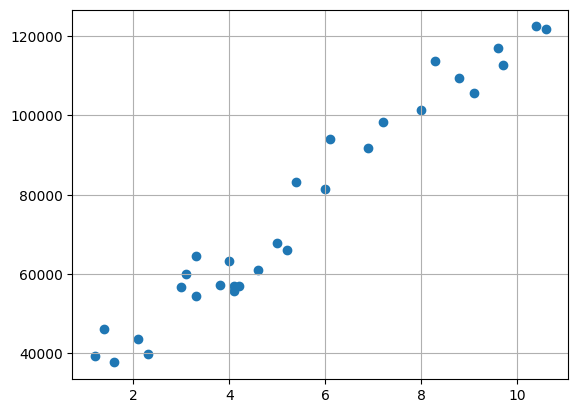

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [5]:
# Selecting the first column of the DataFrame (YearsExperience) as the feature variable X
X = data.iloc[0:len(data), 0]

# Selecting the second column of the DataFrame (Salary) as the target variable Y
Y = data.iloc[0:len(data), 1]

# Creating a grid for the plot to improve visual clarity
axes = plt.axes()
axes.grid()

# Plotting a scatter plot to visualize the relationship between YearsExperience (X) and Salary (Y)
plt.scatter(X, Y) 
plt.show()

# Calculating the correlation between all columns in the DataFrame to examine relationships
data.corr()

We observe a strong correlation between the two variables. When visualizing them on a graph, it becomes apparent that a simple linear regression (a line in this case) would effectively capture and describe the pattern in our data.

## Setting up X and Y data for training

In [6]:
# Initialize the linear regression model
model = LinearRegression()  # Model choice: linear regression

# Split the data into training and test sets
# x_train, y_train are the training features and labels
# x_test, y_test are the test features and labels
x_train, x_test, y_train, y_test = train_test_split(
    data[['YearsExperience']],  # Feature (independent variable)
    data[['Salary']],           # Target (dependent variable)
    test_size=0.2,              # 20% of the data will be used for testing
    random_state=42             # Setting a random state for reproducibility
)

## Model training


In [7]:
# Fit the linear regression model to the training data (x_train, y_train)
model.fit(x_train, y_train)

LinearRegression()

## Results

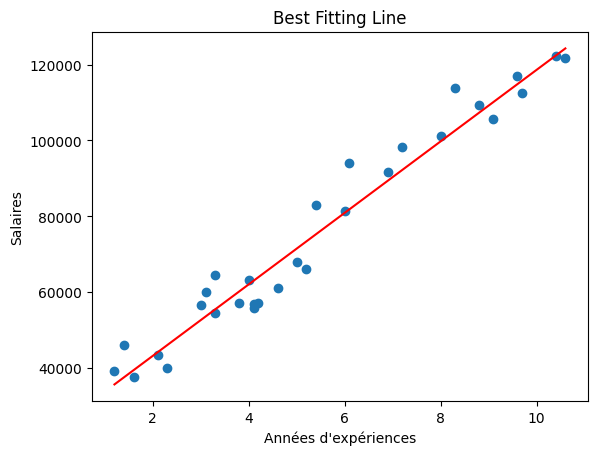

In [8]:
# Assign the 'YearsExperience' column to X (features) and the 'Salary' column to Y_actual (true labels)
X = data.YearsExperience
Y_actual = data.Salary

# Use the trained model to make predictions based on the 'YearsExperience' data
Y_predicted = model.predict(data[['YearsExperience']])

# Plot the actual data points as a scatter plot
plt.scatter(X, Y_actual)

# Plot the best fitting line (predicted values) on top of the scatter plot
plt.plot(X, Y_predicted, color='red')  # Red line for better visibility

# Label the x-axis and y-axis, and add a title
plt.xlabel('Années d\'expériences')  # 'Years of Experience'
plt.ylabel('Salaires')               # 'Salaries'
plt.title('Best Fitting Line')       # Title of the plot

# Display the plot
plt.show()

In [9]:
# Calculate the R^2 score (coefficient of determination) on the training set
train_score = model.score(x_train, y_train)

# Calculate the R^2 score on the test set to evaluate the model's generalization
test_score = model.score(x_test, y_test)

# Print the R^2 scores for both the training and test sets
# R^2 score indicates how well the model explains the variance in the data
print(f"The R^2 score on the training set is: {train_score:.4f}")
print(f"The R^2 score on the test set is: {test_score:.4f}")

The R^2 score on the training set is: 0.9645
The R^2 score on the test set is: 0.9024


### R² Score Interpretation:
- **High R² (close to 1)** on both the training and test sets indicates that the model fits the data well and generalizes effectively to new data.
- **Low R² (close to 0)** indicates poor fit or predictive ability.
- If the **training score is significantly higher than the test score**, it may suggest overfitting (the model is too specific to the training data).

## Saving model

In [10]:
# Saving the trained linear regression model to a file using joblib
joblib.dump(model, 'linearRegressionSalary.joblib')

['linearRegressionSalary.joblib']

## Use model for prediction

In [11]:
# Loading the previously saved linear regression model from the 'linearRegressionSalary.joblib' file
loaded_linearRegressionSalary = joblib.load('linearRegressionSalary.joblib')

# Defining new data points (e.g., new years of experience) for which we want to predict the salary
new_data = [1, 3, 5, 7, 10]

# Reshaping the new data into a 2D array, as the model expects a 2D array of features (each feature should be a column)
new_data_shaped = np.array(new_data).reshape(-1, 1)

# Using the loaded model to predict the salaries for the new data points
predictions = loaded_linearRegressionSalary.predict(new_data_shaped)

# Displaying the predicted salaries for the provided years of experience
predictions

C:\Users\nico1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 33804.0168025 ],
       [ 52651.64744857],
       [ 71499.27809463],
       [ 90346.90874069],
       [118618.35470978]])

## Conclusion 

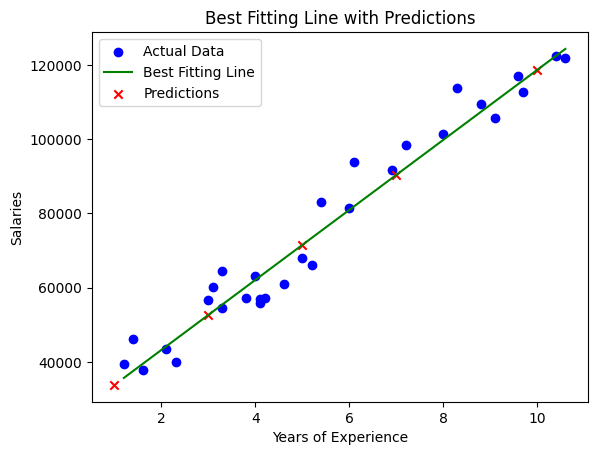

In [12]:
# Plot the actual data points as a scatter plot
plt.scatter(X, Y_actual, label="Actual Data", color="blue")  # Plot original data (YearsExperience vs Salary) in blue

# Plot the best fitting line (predicted values) in green
plt.plot(X, Y_predicted, label="Best Fitting Line", color="green")  # Line representing the model's predictions on the training data

# Plot the new data points and their predictions as red markers ('x')
plt.scatter(new_data, predictions, color="red", label="Predictions", marker="x")  # Red 'x' marks for predicted salaries

# Adding labels and title
plt.xlabel("Years of Experience")  # x-axis label: Years of Experience
plt.ylabel("Salaries")  # y-axis label: Salaries
plt.title("Best Fitting Line with Predictions")  # Title of the plot

# Display the legend to differentiate between actual data, the best fit line, and predictions
plt.legend()

# Show the plot
plt.show()


### Interpretation:

- The model has predicted the following salaries based on the years of experience provided:
  - **1 year of experience**: $33,804.02
  - **3 years of experience**: $52,651.65
  - **5 years of experience**: $71,499.28
  - **7 years of experience**: $90,346.91
  - **10 years of experience**: $118,618.35

These predictions are based on the linear regression model, which learned the relationship between `YearsExperience` and `Salary`. The predictions are continuous values that represent the expected salary for each respective experience level.
